# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
cities_country = []
latitudes = []
longitudes = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cityname = city.city_name
    countryname = city.country_code
    city_with_country = tuple([cityname, countryname.upper()])
    if city_with_country not in cities_country:
        cities_country.append(city_with_country)
        cities.append(city_with_country[0])
        countries.append(city_with_country[1])
        latitudes.append(lat_lng[0])
        longitudes.append(lat_lng[1])

# Print the city count to confirm sufficient count    
totalcities = len(cities_country)
print(f"Total cities are: {totalcities}")

Total cities are: 612


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
dict = {"City": cities, "Country": countries, "Latitude":latitudes, "Longitudes": longitudes}
city_data = pd.DataFrame(dict)
city_data
city_data["Country"]  = np.nan
city_data["Latitude"]  = np.nan
city_data["Longitudes"]  = np.nan
city_data["Max_Temprature(F)"]  = np.nan
city_data["Humidity(%)"]  = np.nan
city_data["Windspeed(MPH)"]  = np.nan
city_data["Cloudiness(%)"]  = np.nan
city_data["Date"] = np.nan
city_data.head()

,City,Country,Latitude,Longitudes,Max_Temprature(F),Humidity(%),Windspeed(MPH),Cloudiness(%),Date
0,katsuura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kodiak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,punta arenas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,grand river south east,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hasaki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
cities

['montego bay',
 'mahebourg',
 'hithadhoo',
 'punta alta',
 'nenjiang',
 'rikitea',
 'bosaso',
 'east london',
 'merauke',
 'busselton',
 'ushuaia',
 'kruisfontein',
 'hilo',
 'corpus christi',
 'muzhi',
 'sarangani',
 'ixtapa',
 'wanning',
 'bredasdorp',
 'chuy',
 'ostrovnoy',
 'severo-kurilsk',
 'samana',
 'bluff',
 'yellowknife',
 'faanui',
 'hobart',
 'lebu',
 'new norfolk',
 'saint-pierre',
 'barrow',
 'nizhneyansk',
 'sambava',
 'puerto carreno',
 'barentsburg',
 'chokurdakh',
 'mataura',
 'vetluga',
 'jamestown',
 'poum',
 'ribeira grande',
 'romny',
 'port alfred',
 'taolanaro',
 'marzuq',
 'pangody',
 'agas',
 'grand gaube',
 'geraldton',
 'khatanga',
 'nantucket',
 'mar del plata',
 'oktyabrskoye',
 'saldanha',
 'nishihara',
 'tuban',
 'clyde river',
 'thompson',
 'hermanus',
 'sepolno krajenskie',
 'cherskiy',
 'mehamn',
 'san cristobal',
 'mahibadhoo',
 'takhtamygda',
 'vaini',
 'lompoc',
 'pringsewu',
 'torbay',
 'butaritari',
 'belushya guba',
 'mitsamiouli',
 'aswan',
 '

In [73]:
data = []
counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# cities = ["Paris", "London", "Oslo", "Beijing"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
#for index, row in city_data.iterrows():
    response = requests.get(query_url + city).json()
    counter=counter+1
        
    try:
        #print(response)
        max_temp=response['main']['temp_max']
       # print(temp)
        country=response['sys']['country']
        #print(country)
        longitude=response['coord']['lon']
        latitude=response['coord']['lat']
        humidity=response['main']['humidity'] 
        wind_speed=response['wind']['speed']
        cloudiness=response['clouds']['all']
        date=response['dt']
        data.append([city,country,latitude,longitude,max_temp,humidity,wind_speed,cloudiness,date])
        print(f"Processing {counter} of {totalcities}: {city}")
        time.sleep(.5)
    except:
        print('City not found...skipping')

Processing 1 of 612: montego bay
Processing 2 of 612: mahebourg
Processing 3 of 612: hithadhoo
Processing 4 of 612: punta alta
Processing 5 of 612: nenjiang
Processing 6 of 612: rikitea
Processing 7 of 612: bosaso
Processing 8 of 612: east london
Processing 9 of 612: merauke
Processing 10 of 612: busselton
Processing 11 of 612: ushuaia
Processing 12 of 612: kruisfontein
Processing 13 of 612: hilo
Processing 14 of 612: corpus christi
Processing 15 of 612: muzhi
Processing 16 of 612: sarangani
Processing 17 of 612: ixtapa
Processing 18 of 612: wanning
Processing 19 of 612: bredasdorp
Processing 20 of 612: chuy
Processing 21 of 612: ostrovnoy
Processing 22 of 612: severo-kurilsk
Processing 23 of 612: samana
Processing 24 of 612: bluff
Processing 25 of 612: yellowknife
Processing 26 of 612: faanui
Processing 27 of 612: hobart
Processing 28 of 612: lebu
Processing 29 of 612: new norfolk
Processing 30 of 612: saint-pierre
Processing 31 of 612: barrow
City not found...skipping
Processing 33 o

Processing 262 of 612: jardim
Processing 263 of 612: harrisonville
Processing 264 of 612: concord
Processing 265 of 612: portland
Processing 266 of 612: opuwo
Processing 267 of 612: jacareacanga
Processing 268 of 612: shibetsu
Processing 269 of 612: ryotsu
Processing 270 of 612: victoria
Processing 271 of 612: buin
Processing 272 of 612: suhbaatar
Processing 273 of 612: lazaro cardenas
Processing 274 of 612: kilindoni
Processing 275 of 612: yichang
Processing 276 of 612: gogrial
Processing 277 of 612: vao
Processing 278 of 612: mandawar
Processing 279 of 612: rum
Processing 280 of 612: mae sot
City not found...skipping
Processing 282 of 612: galesong
Processing 283 of 612: ha tinh
City not found...skipping
Processing 285 of 612: port hardy
Processing 286 of 612: gay
Processing 287 of 612: teknaf
Processing 288 of 612: kinsale
Processing 289 of 612: lichinga
Processing 290 of 612: indramayu
Processing 291 of 612: padang
Processing 292 of 612: barcelos
Processing 293 of 612: henties bay


Processing 521 of 612: kununurra
Processing 522 of 612: maningrida
Processing 523 of 612: kyra
Processing 524 of 612: tamandare
Processing 525 of 612: caxito
Processing 526 of 612: mantenopolis
Processing 527 of 612: linjiang
Processing 528 of 612: port shepstone
Processing 529 of 612: oistins
Processing 530 of 612: canutama
Processing 531 of 612: moussoro
City not found...skipping
Processing 533 of 612: iznoski
Processing 534 of 612: marondera
Processing 535 of 612: guymon
Processing 536 of 612: brae
Processing 537 of 612: vilhena
Processing 538 of 612: cabedelo
Processing 539 of 612: union de san antonio
Processing 540 of 612: narsaq
Processing 541 of 612: sinnamary
Processing 542 of 612: lere
Processing 543 of 612: vikesa
Processing 544 of 612: goundam
Processing 545 of 612: koumac
Processing 546 of 612: greymouth
Processing 547 of 612: nemuro
City not found...skipping
Processing 549 of 612: khorixas
Processing 550 of 612: porto nacional
Processing 551 of 612: cururupu
Processing 55

In [74]:
city_df = pd.DataFrame(data,columns=["City","Country","Latitude","Longitude",
                                     "Max_Temperature(F)","Humidity(%)","Windspeed(mph)","Cloudiness(%)","Date"])
city_df

,City,Country,Latitude,Longitude,Max_Temperature(F),Humidity(%),Windspeed(mph),Cloudiness(%),Date
0,montego bay,JM,18.47,-77.92,28.00,78,5.70,40,1603230980
1,mahebourg,MU,-20.41,57.70,24.00,78,5.10,20,1603231037
2,hithadhoo,MV,-0.60,73.08,27.79,81,6.45,92,1603231038
3,punta alta,AR,-38.88,-62.07,15.07,44,9.08,28,1603231039
4,nenjiang,CN,49.18,125.22,8.96,62,5.30,100,1603231040
...,...,...,...,...,...,...,...,...,...
554,januaria,BR,-15.48,-44.37,23.79,76,2.50,85,1603231673
555,lata,PT,40.16,-8.33,16.67,95,4.02,100,1603231673
556,salinas,US,36.68,-121.66,26.67,49,4.60,1,1603231674
557,springbok,ZA,-29.66,17.89,12.50,41,4.01,0,1603231675


## Convert Raw Data to DataFrame
* Save as csv

In [75]:
# get the data into pandas dataframe
#city_df.count()

# save the data to csv file
city_df.to_csv("../output_data/CityData.csv", index=False, header=True)
#file_one_df.to_csv("Output/fileOne.csv", index=False, header=True)
city_df.head()

,City,Country,Latitude,Longitude,Max_Temperature(F),Humidity(%),Windspeed(mph),Cloudiness(%),Date
0,montego bay,JM,18.47,-77.92,28.00,78,5.70,40,1603230980
1,mahebourg,MU,-20.41,57.70,24.00,78,5.10,20,1603231037
2,hithadhoo,MV,-0.60,73.08,27.79,81,6.45,92,1603231038
3,punta alta,AR,-38.88,-62.07,15.07,44,9.08,28,1603231039
4,nenjiang,CN,49.18,125.22,8.96,62,5.30,100,1603231040


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

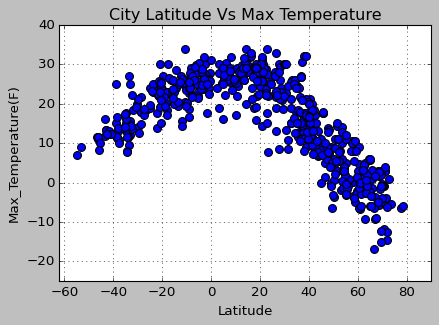

In [78]:
city_df.plot(kind="scatter", x="Latitude", y="Max_Temperature(F)", xlim = (-62, 90), 
                     ylim= (-25, 40), s= 50, grid = True, edgecolor = "black", figsize=(6,4), 
                     title= f"City Latitude Vs Max Temperature")
plt.savefig("../Images/LatitudeVsMaxTemp.png")
plt.show()
# Temperature is highest near the equator; temperature decreases, as we go away from equator; 
# temperature in the norther hemisphere is lower when compared to temperatures in the southern hemisphere.

### Latitude vs. Humidity Plot

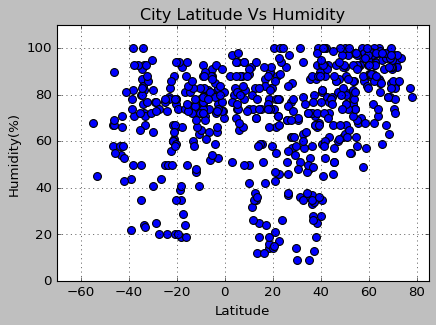

In [79]:
city_df.plot(kind="scatter", x="Latitude", y="Humidity(%)", xlim = (-70, 85), 
                     ylim= (0, 110), s= 50, grid = True, edgecolor = "black", figsize=(6,4), 
                     title= f"City Latitude Vs Humidity")
plt.savefig("../Images/LatitudeVsHumidity.png")
plt.show()
# Higher Humidity is observed towards the north of equator

### Latitude vs. Cloudiness Plot

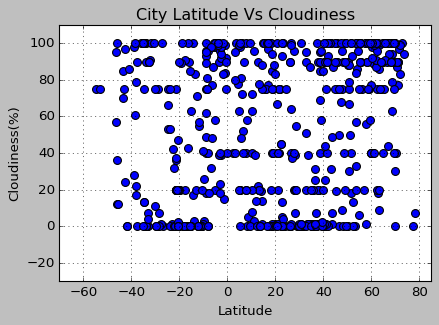

In [80]:
city_df.plot(kind="scatter", x="Latitude", y="Cloudiness(%)", xlim = (-70, 85), 
                     ylim= (-30, 110), s= 50, grid = True, edgecolor = "black", figsize=(6,4), 
                     title= f"City Latitude Vs Cloudiness")
plt.savefig("../Images/LatitudeVsCloudiness.png")
plt.show()
# Unable to draw any common inference between the latitudes and cloudiness; cloudiness ranges between 0 and 100

### Latitude vs. Wind Speed Plot

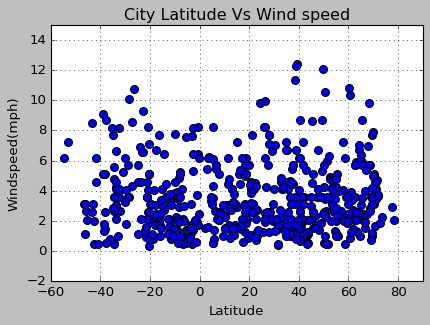

In [82]:
city_df.plot(kind="scatter", x="Latitude", y="Windspeed(mph)", xlim = (-60, 90), 
                     ylim= (-2, 15), s= 50, grid = True, edgecolor = "black", figsize=(6,4), 
                     title= f"City Latitude Vs Wind speed")
plt.savefig("../Images/LatitudeVsWindSpeed.png")
plt.show()
# Wind speed is the lowest around the equator and increases as we progress towards the poles

## Linear Regression

### Write linear regression plot function (optional)

NameError: name 'st' is not defined

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.8852356658927735


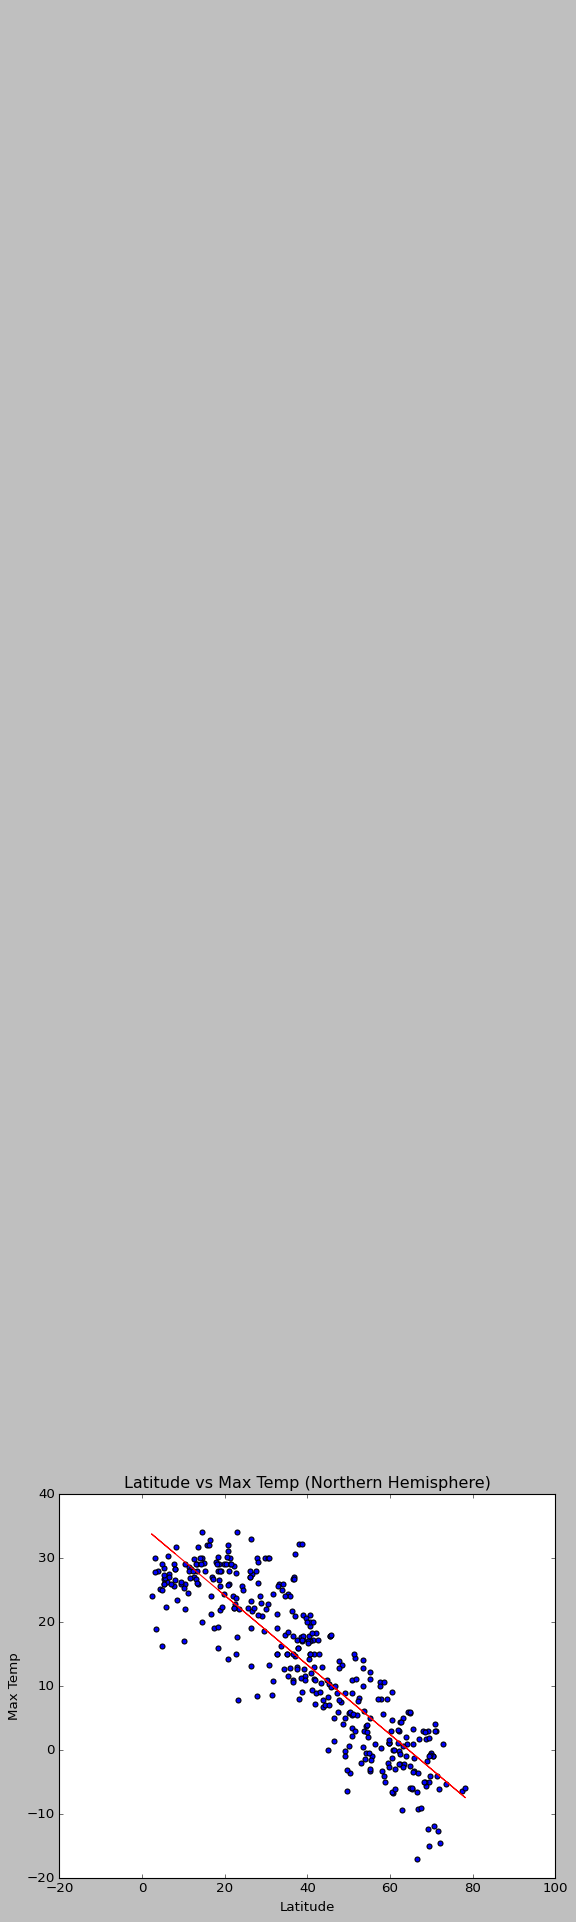

In [83]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = city_df.loc[city_df["Latitude"] >= 0]
#print(northern_hem)
southern_hem = city_df.loc[city_df["Latitude"] < 0]
#print(southern_hem)
x_values=northern_hem["Latitude"]
y_values=northern_hem["Max_Temperature(F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,260),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.794291818971207


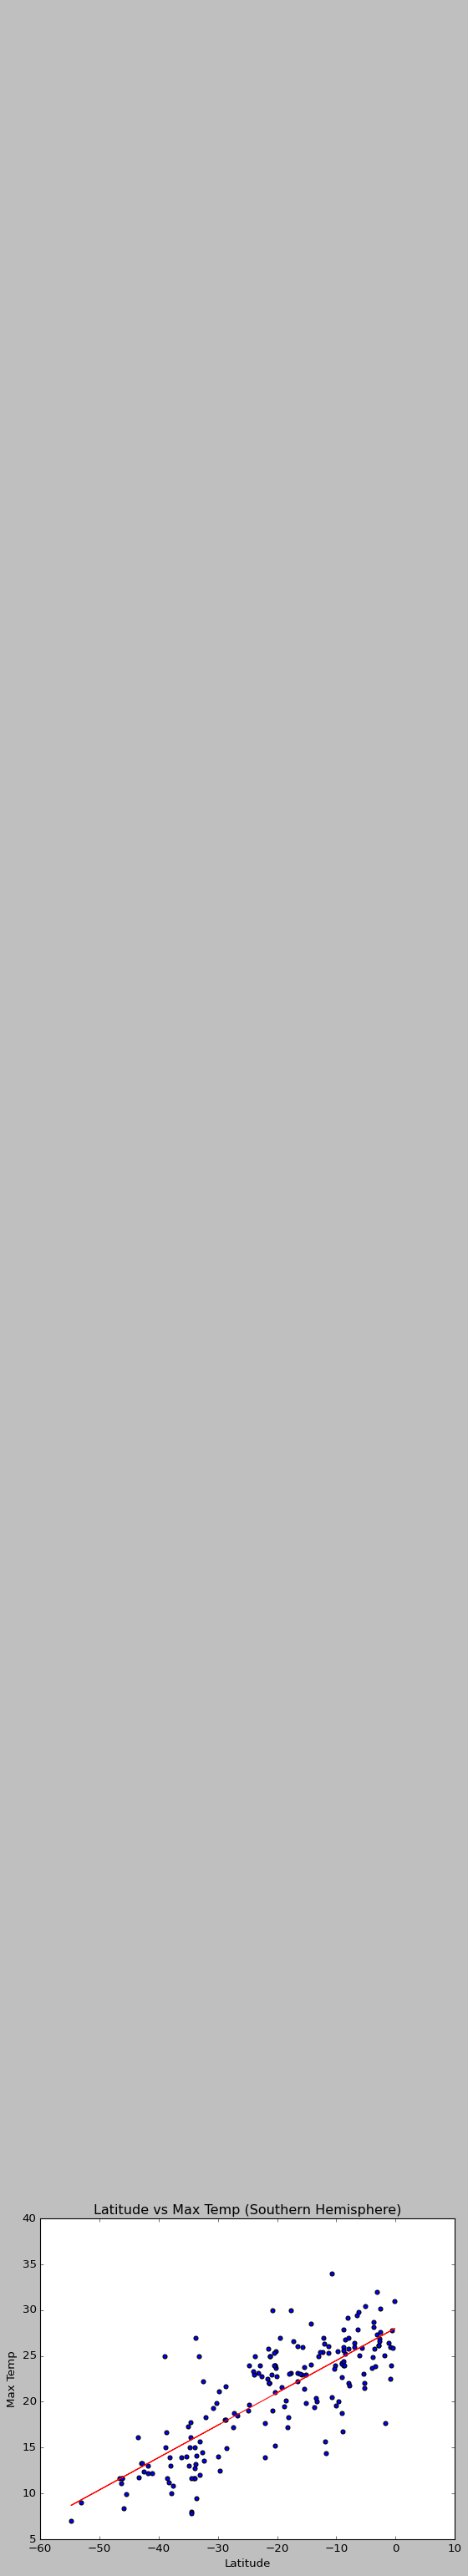

In [84]:
x_values=southern_hem["Latitude"]
y_values=southern_hem["Max_Temperature(F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,280),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-30,275),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Max Temp (Southern Hemisphere).png")
plt.show()

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.3569942319975116


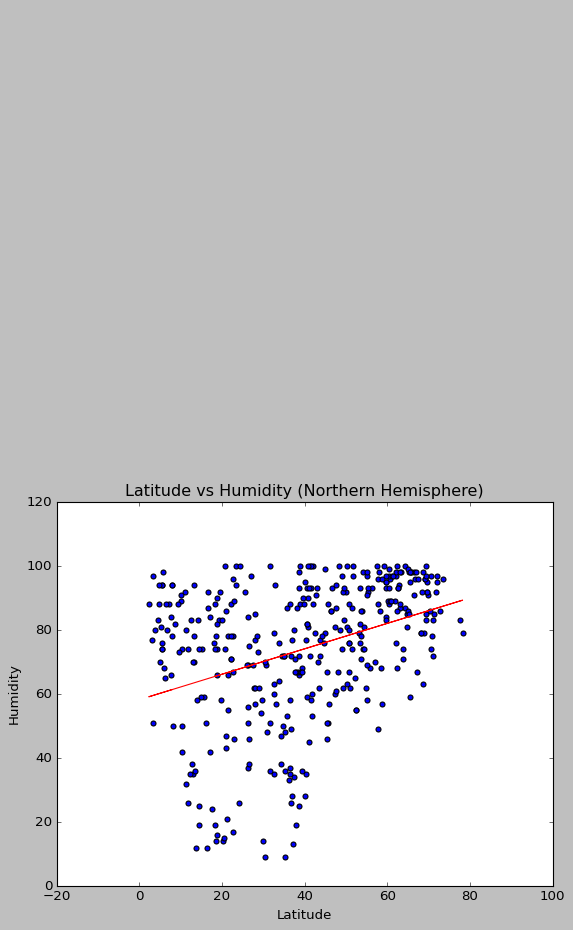

In [85]:
x_values=northern_hem["Latitude"]
y_values=northern_hem["Humidity(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,260),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Humidity (Northern Hemisphere).png")
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.15903884107363442


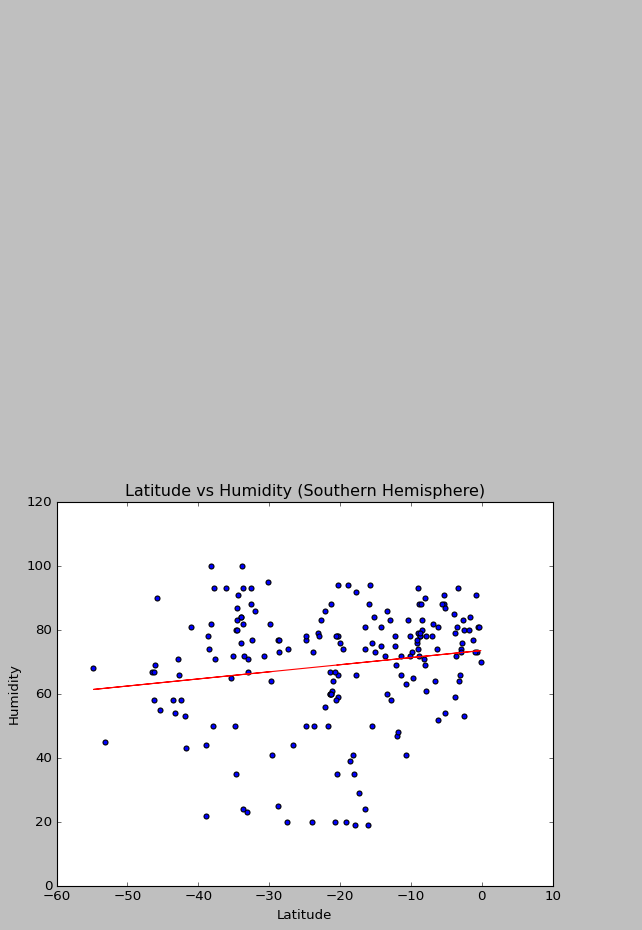

In [86]:
x_values=southern_hem["Latitude"]
y_values=southern_hem["Humidity(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Southern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,260),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Humidity (Southern Hemisphere).png")
plt.show()

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.31527730458955877


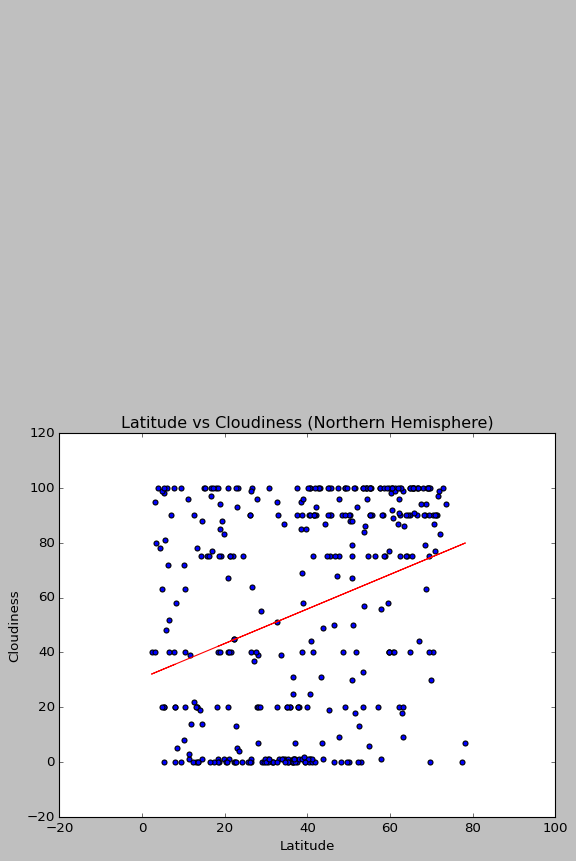

In [87]:
x_values=northern_hem["Latitude"]
y_values=northern_hem["Cloudiness(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,260),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Cloudiness (Northern Hemisphere).png")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.11206393081928853


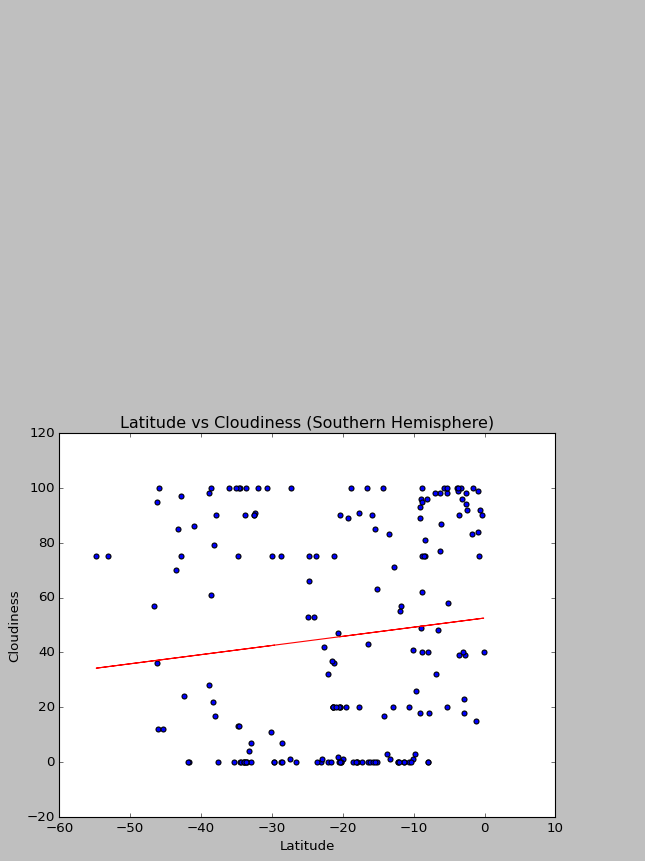

In [88]:
x_values=southern_hem["Latitude"]
y_values=southern_hem["Cloudiness(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Southern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,260),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs Cloudiness (Southern Hemisphere).png")
plt.show()

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.06005085054144649


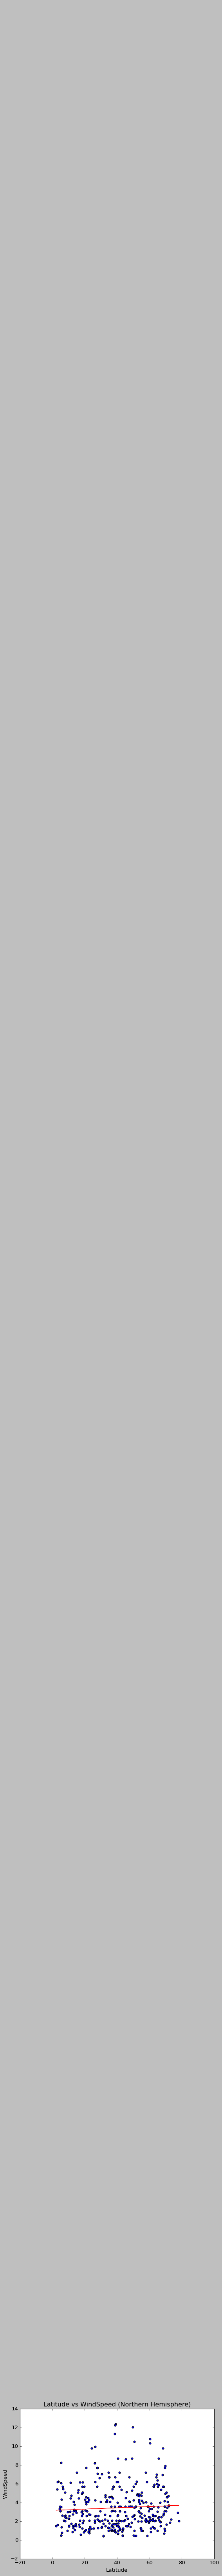

In [90]:
x_values=northern_hem["Latitude"]
y_values=northern_hem["Windspeed(mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('WindSpeed')
plt.xlabel('Latitude')
plt.title('Latitude vs WindSpeed (Northern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,260),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs WindSpeed (Northern Hemisphere).png")
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.17804253187645366


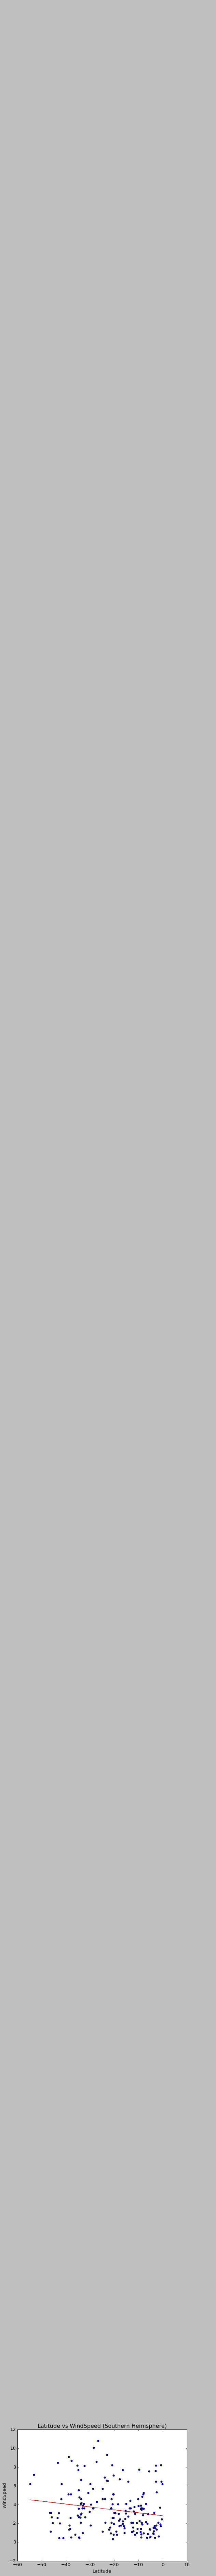

In [91]:
x_values=southern_hem["Latitude"]
y_values=southern_hem["Windspeed(mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('WindSpeed')
plt.xlabel('Latitude')
plt.title('Latitude vs WindSpeed (Southern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,260),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("Latitude vs WindSpeed (Southern Hemisphere).png")
plt.show()